In [1]:
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet, VGG16
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image

import os 

Using TensorFlow backend.


In [2]:
# The VGG16 model
base_model=VGG16(weights='imagenet',include_top=False) #imports the VGG16 model and discards the last 1000 neuron layer.

base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [3]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(2,activation='softmax')(x) #final layer with softmax activation

In [4]:
model=Model(inputs=base_model.input,outputs=preds)

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

In [5]:
# freeze all layers except for the last 4 
for layer in model.layers[:len(model.layers)-4]:
    layer.trainable=False  
for layer in model.layers[len(model.layers)-4:]:
    layer.trainable=True

In [6]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

In [7]:
# preparing training data with image generator 
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('databaru',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 1624 images belonging to 2 classes.


In [8]:
# compiling the model
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10)

Epoch 1/10
50/50 [==============================] - 90s 2s/step - loss: 0.1935 - accuracy: 0.9196
Epoch 2/10
50/50 [==============================] - 90s 2s/step - loss: 0.0071 - accuracy: 0.9981
Epoch 4/10
50/50 [==============================] - 90s 2s/step - loss: 0.0022 - accuracy: 0.9994
Epoch 5/10
50/50 [==============================] - 90s 2s/step - loss: 5.4269e-04 - accuracy: 1.0000
Epoch 6/10
50/50 [==============================] - 90s 2s/step - loss: 2.0648e-05 - accuracy: 1.0000
Epoch 7/10
50/50 [==============================] - 90s 2s/step - loss: 6.0668e-06 - accuracy: 1.0000
Epoch 8/10
50/50 [==============================] - 90s 2s/step - loss: 3.4517e-06 - accuracy: 1.0000
Epoch 9/10
50/50 [==============================] - 91s 2s/step - loss: 3.5687e-06 - accuracy: 1.0000
Epoch 10/10
50/50 [==============================] - 90s 2s/step - loss: 1.2550e-06 - accuracy: 1.0000


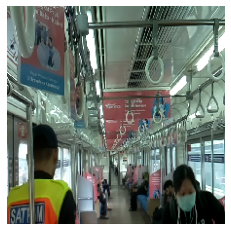

rendah


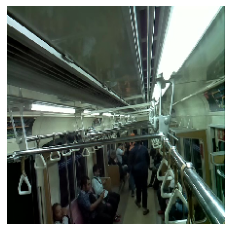

rendah


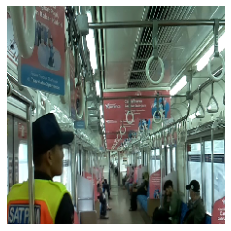

rendah


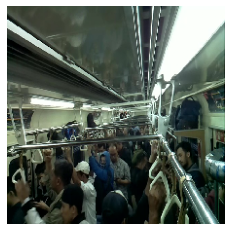

tinggi


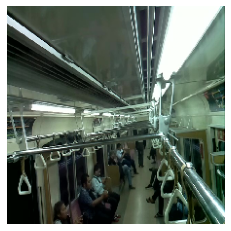

rendah


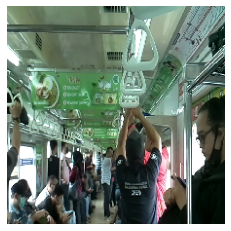

rendah


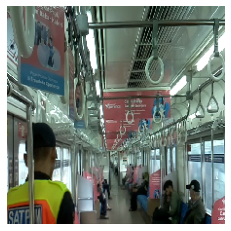

rendah


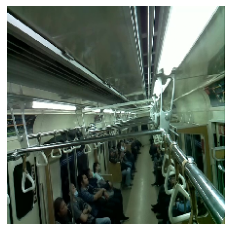

rendah


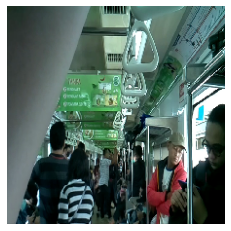

rendah


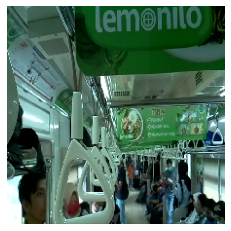

rendah


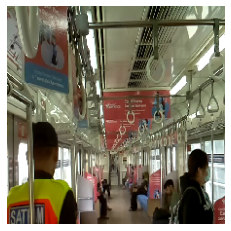

rendah


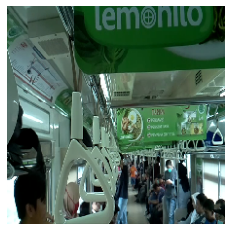

rendah


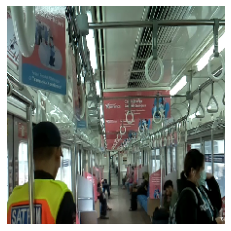

rendah


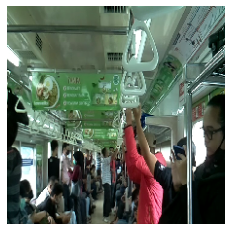

tinggi


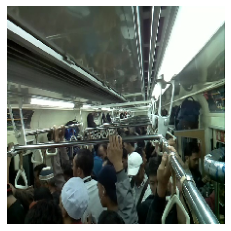

tinggi


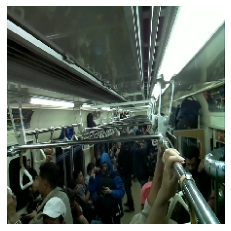

tinggi


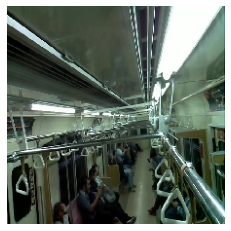

rendah


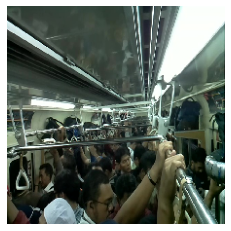

tinggi


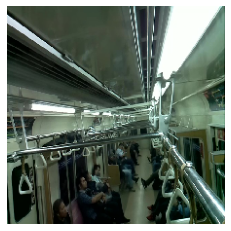

rendah


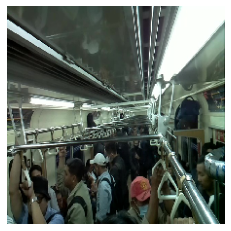

tinggi


In [9]:
import matplotlib.pyplot as plt
import os 
cwd = os.getcwd()

def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(224, 224))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

categories = ['rendah', 'tinggi']

for img in os.listdir(cwd + '/test'):
    img_path = os.path.join(cwd, 'test', img)
    new_image = load_image(img_path, True)

    pred = model.predict(new_image)

    print(categories[pred.argmax(axis=1)[0]])

In [10]:
from keras.models import save_model
# save the model 
save_model(model, "vgg16_many.h5")